<a href="https://colab.research.google.com/github/jfmvs/Steam-Games/blob/main/Steam_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import matplotlib as plt
import numpy as np

# Coletando os dados

In [188]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jfmvs/Steam-Games/main/data/steam.csv')

In [189]:
dataset.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


# Pré-processamento

## Definição de tipos

In [190]:
dataset.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [191]:
dataset['release_date'] = dataset['release_date'].astype('datetime64[ns]')
dataset['name'] = dataset['name'].astype('category')
dataset['english'] = dataset['english'].astype('boolean')
dataset['publisher'] = dataset['publisher'].astype('category')
dataset['developer'] = dataset['developer'].astype('category')
dataset['platforms'] = dataset['platforms'].astype('category')
dataset['categories'] = dataset['categories'].astype('category')
dataset['genres'] = dataset['genres'].astype('category')
dataset['steamspy_tags'] = dataset['steamspy_tags'].astype('category')

In [192]:
dataset.dtypes

appid                        int64
name                      category
release_date        datetime64[ns]
english                    boolean
developer                 category
publisher                 category
platforms                 category
required_age                 int64
categories                category
genres                    category
steamspy_tags             category
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                      object
price                      float64
dtype: object

## Tratando dados ausentes

In [193]:
dataset.loc[(dataset.average_playtime == 0) & (dataset.median_playtime == 0)]
print(dataset.loc[(dataset.average_playtime == 0) & (dataset.median_playtime == 0)].shape)

(20905, 18)


In [194]:
dataset.average_playtime.describe()

count     27075.000000
mean        149.804949
std        1827.038141
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      190625.000000
Name: average_playtime, dtype: float64

In [195]:
dataset.drop('average_playtime', axis=1, inplace=True)
dataset.drop('median_playtime', axis=1, inplace=True)

## Normalização e discretização

In [196]:
dataset.positive_ratings.describe()

count    2.707500e+04
mean     1.000559e+03
std      1.898872e+04
min      0.000000e+00
25%      6.000000e+00
50%      2.400000e+01
75%      1.260000e+02
max      2.644404e+06
Name: positive_ratings, dtype: float64

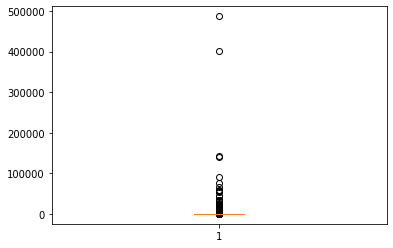

In [197]:
import matplotlib.pyplot as plt1
 
# Creating plot
data = [dataset.negative_ratings]
plt.pyplot.boxplot(data)
# show plot
plt.pyplot.show()

In [198]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
dataset['pos_norm'] = scaler.fit_transform(dataset[['positive_ratings']])
dataset['pos_norm'].describe()

count    27075.000000
mean         0.000378
std          0.007181
min          0.000000
25%          0.000002
50%          0.000009
75%          0.000048
max          1.000000
Name: pos_norm, dtype: float64

In [199]:
dataset['neg_norm'] = scaler.fit_transform(dataset[['negative_ratings']])
dataset['neg_norm'].describe()

count    27075.000000
mean         0.000433
std          0.008797
min          0.000000
25%          0.000004
50%          0.000018
75%          0.000086
max          1.000000
Name: neg_norm, dtype: float64

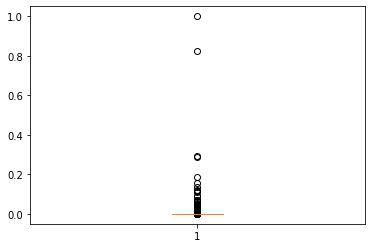

In [200]:
plt.pyplot.boxplot(dataset.neg_norm)
# show plot
plt.pyplot.show()

In [201]:
dataset.loc[dataset.pos_norm == dataset.pos_norm.min()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,owners,price,pos_norm,neg_norm
577,32000,Raycatcher,2009-04-17,True,Thinking Studios;Slam Dunk Studios,Thinking Studios,windows,0,Single-player,Indie;Casual,Indie;Casual,0,0,13,0-20000,3.99,0.0,0.000027
683,36900,Angle of Attack,2009-08-17,True,3000AD,3000AD,windows,0,Single-player;Multi-player;Co-op;Partial Contr...,Action;Simulation,Simulation;Action,0,0,2,0-20000,6.99,0.0,0.000004
4503,341010,Pluck,2015-07-31,True,Benjamin Lapid,Benjamin Lapid,windows,0,Single-player;Shared/Split Screen;Full control...,Action;Adventure;Indie;Early Access,Early Access;Action;Adventure,0,0,3,0-20000,6.99,0.0,0.000006
4742,346760,ProtoMasons,2017-10-02,True,ProtoMasons.com,ProtoMasons.com,windows,0,Multi-player;Online Multi-Player;Steam Achieve...,Casual;Indie;Simulation;Early Access,Early Access;Indie;Casual,36,0,2,0-20000,7.19,0.0,0.000004
4757,347050,Vol'Talkes - The AI War,2015-02-25,True,HyperDrive Games,HyperDrive Games,windows,0,Single-player;Multi-player;Co-op;Steam Achieve...,Indie;Strategy;Early Access,Early Access;Strategy;Indie,0,0,2,0-20000,22.99,0.0,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27008,1054900,DevilShaft: TheTower,2019-04-12,True,SureCreator,Metal Fox,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Indie,Indie;Adventure,7,0,1,0-20000,4.79,0.0,0.000002
27051,1060110,Space Trade Fleet 1.5,2019-04-19,True,Zeta Heo,Zeta Heo,windows,0,Single-player,Action;Casual;Indie;RPG,Indie;Action;Casual,0,0,1,0-20000,0.79,0.0,0.000002
27056,1060870,"Hello, World.",2019-04-19,True,Meatball Parm Games,Meatball Parm Games,windows,0,Single-player,Casual;Indie,Casual;Indie,0,0,1,0-20000,2.89,0.0,0.000002
27060,1062240,地铁：恐怖末班车,2019-04-25,False,QZQ Studio,"H.P.Y.S,LLC",windows,0,Single-player,Action;Adventure;Indie;RPG,Action;Adventure;RPG,0,0,2,0-20000,2.09,0.0,0.000004


In [202]:
# discretizando com 10 bins com mesmo intervalo
dataset['prices_disc'] = pd.qcut(dataset['price'],4)

In [203]:
dataset['prices_disc'].value_counts()

(-0.001, 1.69]    7498
(3.99, 7.19]      6735
(1.69, 3.99]      6690
(7.19, 421.99]    6152
Name: prices_disc, dtype: int64

## Limpeza de dados

In [204]:
len(dataset)

27075

### Univariado

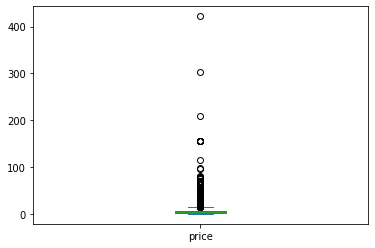

In [205]:
dataset['price'].plot.box()

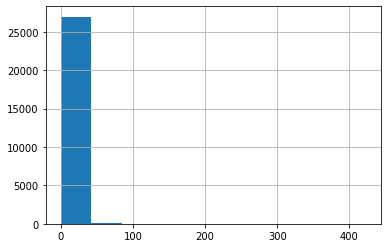

In [206]:
dataset['price'].hist()

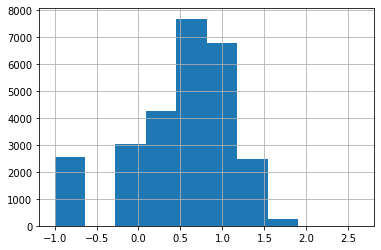

In [207]:
from numpy import log10
dataset['price'] = dataset['price'].apply(lambda x: 0.1 if x == 0 else x)
dataset['price_log'] = log10(dataset['price'])
dataset['price_log'].hist()

In [208]:
q1 = dataset['price_log'].quantile(q=0.25)
q3 = dataset['price_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.628842185769209


In [209]:
dataset[dataset['price_log'] < (q1-1.5*iqr)]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,owners,price,pos_norm,neg_norm,prices_disc,price_log
11,280,Half-Life: Source,2004-06-01,True,Valve,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3767,1053,2000000-5000000,0.1,0.001425,0.002162,"(-0.001, 1.69]",-1.0
14,340,Half-Life 2: Lost Coast,2005-10-27,True,Valve,Valve,windows;mac;linux,0,Single-player;Commentary available,Action,FPS;Action;Singleplayer,0,5783,1020,10000000-20000000,0.1,0.002187,0.002094,"(-0.001, 1.69]",-1.0
15,360,Half-Life Deathmatch: Source,2006-05-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,Action;FPS;Multiplayer,0,1362,473,5000000-10000000,0.1,0.000515,0.000971,"(-0.001, 1.69]",-1.0
19,440,Team Fortress 2,2007-10-10,True,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,20000000-50000000,0.1,0.195083,0.069878,"(-0.001, 1.69]",-1.0
22,570,Dota 2,2013-07-09,True,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,100000000-200000000,0.1,0.326541,0.291698,"(-0.001, 1.69]",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27026,1056710,VTB Basketball League VR,2019-04-12,False,Axyos Games,LikeVR,windows,0,Single-player,Casual;Free to Play;Sports,Free to Play;Casual;Sports,0,3,0,0-20000,0.1,0.000001,0.000000,"(-0.001, 1.69]",-1.0
27029,1057420,Earthshakers,2019-04-22,True,"Kaleido, Inc.","Kaleido, Inc.",windows,0,Single-player,Action;Free to Play;Indie,Action;Indie;Free to Play,0,3,7,0-20000,0.1,0.000001,0.000014,"(-0.001, 1.69]",-1.0
27030,1057430,Geometry May. I swear it's a nice free game,2019-04-16,True,PixelGreeds,PixelGreeds,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Free to Play;Indie,Nudity;Sexual Content;Free to Play,7,83,15,0-20000,0.1,0.000031,0.000031,"(-0.001, 1.69]",-1.0
27034,1057690,Sin Slayers: The First Sin,2019-04-11,True,goonswarm,Black Tower Entertainment,windows,0,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,RPG;Indie;Adventure,0,101,29,20000-50000,0.1,0.000038,0.000060,"(-0.001, 1.69]",-1.0


In [210]:
dataset[dataset['price_log'] > (q3+1.5*iqr)]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,owners,price,pos_norm,neg_norm,prices_disc,price_log
1102,100980,3DCoat 4.8,2012-10-02,True,Pilgway,Pilgway,windows,0,Steam Cloud,Animation & Modeling,Animation & Modeling,0,75,5,0-20000,95.99,2.836178e-05,0.000010,"(7.19, 421.99]",1.982226
1904,248170,Clickteam Fusion 2.5,2013-12-05,True,Clickteam,Clickteam,windows,0,Single-player;Multi-player;MMO;Co-op;Shared/Sp...,Animation & Modeling;Education;Utilities;Web P...,Game Development;Animation & Modeling;Web Publ...,0,616,71,100000-200000,69.99,2.329447e-04,0.000146,"(7.19, 421.99]",1.845036
1988,251810,Leadwerks Game Engine,2014-01-06,True,Leadwerks Software,Leadwerks Software,windows,0,Single-player;Steam Achievements;Steam Worksho...,Animation & Modeling;Design & Illustration;Edu...,Animation & Modeling;Game Development;Design &...,3,211,77,20000-50000,78.99,7.979114e-05,0.000158,"(7.19, 421.99]",1.897572
2049,253670,Aartform Curvy 3D 3.0,2013-11-12,True,Aartform,Aartform,windows,0,Single-player,Animation & Modeling,Animation & Modeling,0,33,12,0-20000,75.99,1.247918e-05,0.000025,"(7.19, 421.99]",1.880756
7696,431030,The Music Room,2017-08-17,True,Chroma Coda,Chroma Coda,windows,0,VR Support,Audio Production,Audio Production,0,0,1,0-20000,98.99,0.000000e+00,0.000002,"(7.19, 421.99]",1.995591
7992,438450,3DF Zephyr Lite Steam Edition,2016-02-02,True,3Dflow SRL,3Dflow SRL,windows,0,Steam Trading Cards,Animation & Modeling;Design & Illustration;Vid...,Video Production;Design & Illustration;Animati...,0,30,2,0-20000,154.99,1.134471e-05,0.000004,"(7.19, 421.99]",2.190304
10034,502570,Houdini Indie,2018-10-10,True,SideFX,SideFX,windows,0,Partial Controller Support;Steam Cloud,Animation & Modeling;Design & Illustration;Gam...,Animation & Modeling;Game Development;3D,0,23,0,0-20000,209.99,8.697612e-06,0.000000,"(7.19, 421.99]",2.322199
10624,517500,Tactics: Bludgeons Blessing,2017-07-04,True,Capt. McCay Soft,Capt. McCay Soft,windows;mac,0,Single-player;Steam Trading Cards,Action;Simulation;Strategy,Strategy;Action;Simulation,0,0,4,0-20000,154.99,0.000000e+00,0.000008,"(7.19, 421.99]",2.190304
10910,526310,Silhouette,2016-11-13,True,Apeirogon Games,Apeirogon Games,windows,0,Single-player;Partial Controller Support,Adventure;Indie;Early Access,Early Access;Adventure;Indie,0,13,4,0-20000,154.99,4.916042e-06,0.000008,"(7.19, 421.99]",2.190304
12212,561690,Emission VR,2016-11-30,True,VRSpec Team,VRSpec Team,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Indie,Action;Adventure;Indie,6,2,5,0-20000,75.99,7.563141e-07,0.000010,"(7.19, 421.99]",1.880756


In [211]:
dataset = dataset[(dataset['price_log'] > (q1-1.5*iqr)) & (dataset['price_log'] < (q3+1.5*iqr))]
len(dataset)

24493

### Bivariado

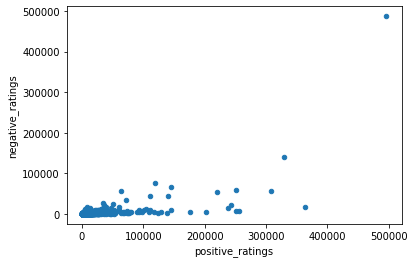

In [213]:
dataset.plot.scatter(x='positive_ratings',y='negative_ratings')


In [214]:
dataset['reviews'] = dataset['positive_ratings'] - dataset['negative_ratings']

In [215]:
dataset['reviews'].describe()

count     24493.000000
mean        618.185318
std        6183.014123
min       -7738.000000
25%           1.000000
50%          11.000000
75%          66.000000
max      347288.000000
Name: reviews, dtype: float64

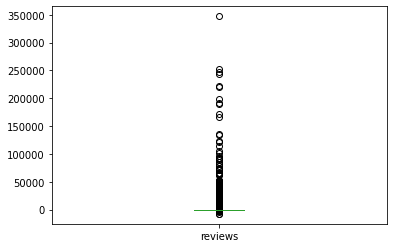

In [216]:
dataset['reviews'].plot.box()

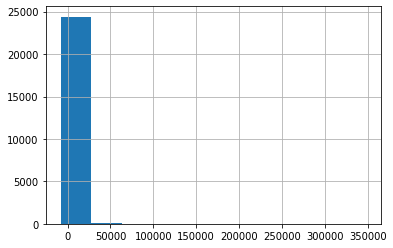

In [217]:
dataset['reviews'].hist()

In [218]:
mad = abs(dataset['reviews'] - dataset['reviews'].median()).median()*(1/0.6745)

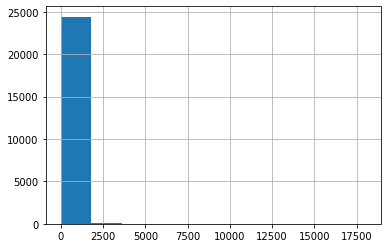

In [219]:
(abs(dataset['reviews']-dataset['reviews'].median())/mad).hist()

In [220]:
dataset[abs(dataset['reviews']-dataset['reviews'].median())/mad >3.5]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,owners,price,pos_norm,neg_norm,prices_disc,price_log,reviews
0,10,Counter-Strike,2000-11-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,124534,3339,10000000-20000000,7.19,0.047093,0.006855,"(3.99, 7.19]",0.856729,121195
1,20,Team Fortress Classic,1999-04-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,3318,633,5000000-10000000,3.99,0.001255,0.001300,"(1.69, 3.99]",0.600973,2685
2,30,Day of Defeat,2003-05-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,3416,398,5000000-10000000,3.99,0.001292,0.000817,"(1.69, 3.99]",0.600973,3018
3,40,Deathmatch Classic,2001-06-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,1273,267,5000000-10000000,3.99,0.000481,0.000548,"(1.69, 3.99]",0.600973,1006
4,50,Half-Life: Opposing Force,1999-11-01,True,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,5250,288,5000000-10000000,3.99,0.001985,0.000591,"(1.69, 3.99]",0.600973,4962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26742,1035610,Hentai Mosaique Vip Room,2019-04-10,True,Lil Hentai Games,Lil Hentai Games,windows,0,Single-player;Steam Achievements;Steam Cloud,Action;Casual;Indie;RPG;Simulation,...,100,149,6,0-20000,1.69,0.000056,0.000012,"(-0.001, 1.69]",0.227887,143
26780,1037190,Shipped,2019-03-28,True,Majorariatto,Majorariatto,windows;mac;linux,0,Single-player;Multi-player;Local Multi-Player;...,Action;Casual;Indie;Sports,...,11,296,2,0-20000,5.20,0.000112,0.000004,"(3.99, 7.19]",0.716003,294
26899,1046030,ISLANDERS,2019-04-04,True,GrizzlyGames,GrizzlyGames,windows,0,Single-player;Steam Achievements;Steam Leaderb...,Casual;Indie;Strategy,...,26,1490,77,100000-200000,4.79,0.000563,0.000158,"(3.99, 7.19]",0.680336,1413
26919,1047680,ALILIA-亚利利亚的精灵们,2019-04-05,False,CC.D,CC.D;冷笑黑妖,windows,0,Single-player;Steam Achievements;Steam Cloud,Action;Adventure;Indie;RPG,...,8,86,0,0-20000,2.89,0.000033,0.000000,"(1.69, 3.99]",0.460898,86


In [221]:
dataset = dataset[abs(dataset['reviews']-dataset['reviews'].median())/mad < 3.5]
print(len(dataset))

18477


In [222]:
dataset.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,owners,price,pos_norm,neg_norm,prices_disc,price_log,reviews
26,1002,Rag Doll Kung Fu,2005-10-12,True,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,...,0,40,17,20000-50000,5.99,0.000015,0.000035,"(3.99, 7.19]",0.777427,23
38,1670,Iron Warriors: T - 72 Tank Command,2006-07-26,True,Strategy First,Strategy First,windows,0,Single-player;Multi-player,Strategy,...,0,137,102,20000-50000,3.99,0.000052,0.000209,"(1.69, 3.99]",0.600973,35
53,2330,QUAKE II Mission Pack: The Reckoning,2007-08-03,True,Xatrix Entertainment,id Software,windows,0,Single-player;Multi-player;Steam Cloud,Action,...,0,65,12,200000-500000,2.49,0.000025,0.000025,"(1.69, 3.99]",0.396199,53
54,2340,QUAKE II Mission Pack: Ground Zero,2007-08-03,True,Rogue Entertainment,id Software,windows,0,Single-player;Multi-player;Steam Cloud,Action,...,0,54,33,200000-500000,2.49,0.000020,0.000068,"(1.69, 3.99]",0.396199,21
55,2350,QUAKE III: Team Arena,2007-08-03,True,id Software,id Software,windows,0,Single-player;Multi-player;Steam Cloud,Action,...,0,108,31,200000-500000,12.99,0.000041,0.000064,"(7.19, 421.99]",1.113609,77


# Análise descritiva dos dados e Hipótese

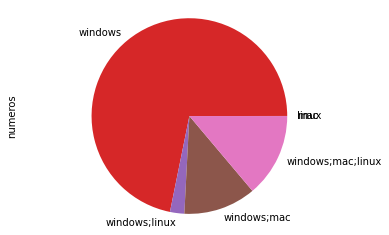

In [223]:
platforms = pd.Series(dataset['platforms'].value_counts())
df = pd.DataFrame({
    'plataformas': ['windows','windows;mac;linux','windows;mac','windows;linux','mac','linux','mac;linux'],
    'numeros': platforms})
df.numeros.groupby(df.plataformas).sum().plot(kind='pie')
plt.pyplot.axis('equal')
plt.pyplot.show()

In [224]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jfmvs/Steam-Games/main/data/steam.csv')

In [225]:
new_ds = dataset.sort_values(by ='positive_ratings', ascending = False).head(10)
new_ds

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
1467,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,308657,56523,3975,890,10000000-20000000,7.49
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00
1120,105600,Terraria,2011-05-16,1,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,88,255600,7797,5585,1840,5000000-10000000,6.99
21,550,Left 4 Dead 2,2009-11-19,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,70,251789,8418,1615,566,10000000-20000000,7.19


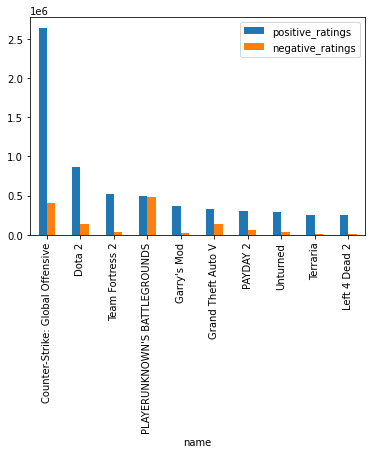

In [226]:
new_ds = dataset.sort_values(by ='positive_ratings', ascending = False).head(10)
new_ds.plot(x="name", y=["positive_ratings", "negative_ratings"], kind="bar")

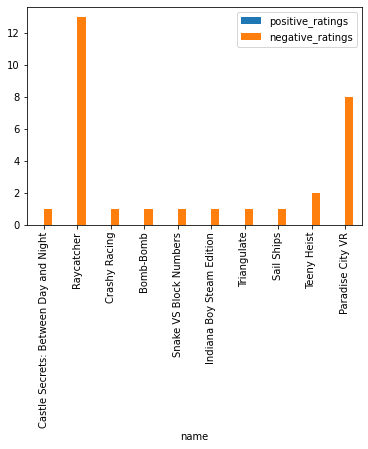

In [227]:
new_ds = dataset.sort_values(by ='positive_ratings', ascending = True).head(10)
new_ds.plot(x="name", y=["positive_ratings", "negative_ratings"], kind="bar")

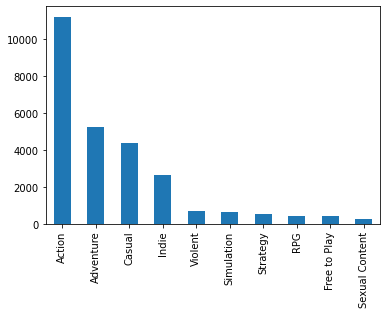

In [228]:
top = dataset['genres'].apply(lambda x: x.split(';')[0]).value_counts().head(10)
top.plot(kind='bar')